# Linear Regression Assessment

### In this task you are required to apply a machine learning algorithm to the dataset houseprice_data.csv which can be downloaded from the assignment task on canvas. This data set contains information about house sales in King County, USA. The data has 18 features, such as: number of bedrooms, bathrooms, floors etc., and a target variable: house price. Using linear regression (simple or multiple), develop a model to predict the price of a house. After developing the model you should also analyse the results and discuss the effectiveness of the model, outlining the improvements when developing the model.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = r"C:\Users\User\Downloads\houseprice_data (1).csv"

houseprice = pd.read_csv(path)

houseprice.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Loading and exploring the data

In [3]:
houseprice.describe().T

,count,mean,std,min,25%,50%,75%,max
price,21613.0,540182.158793,367362.231718,75000.0000,321950.000,450000.0000,645000.000,7.700000e+06
bedrooms,21613.0,3.370842,0.930062,0.0000,3.000,3.0000,4.000,3.300000e+01
bathrooms,21613.0,2.114757,0.770163,0.0000,1.750,2.2500,2.500,8.000000e+00
sqft_living,21613.0,2079.899736,918.440897,290.0000,1427.000,1910.0000,2550.000,1.354000e+04
sqft_lot,21613.0,15106.967566,41420.511515,520.0000,5040.000,7618.0000,10688.000,1.651359e+06
floors,21613.0,1.494309,0.539989,1.0000,1.000,1.5000,2.000,3.500000e+00
waterfront,21613.0,0.007542,0.086517,0.0000,0.000,0.0000,0.000,1.000000e+00
view,21613.0,0.234303,0.766318,0.0000,0.000,0.0000,0.000,4.000000e+00
condition,21613.0,3.409430,0.650743,1.0000,3.000,3.0000,4.000,5.000000e+00
grade,21613.0,7.656873,1.175459,1.0000,7.000,7.0000,8.000,1.300000e+01


#### Drawing an insight from desciptive analysis

- the lowest price is 75,000 while the highest price is 7,700,000
- the minimum number of bedroom is zero while maximum number is 33 bedrooms
- the minimum number of bathroom is zero while maximum number is 8 bedrooms
- grade is between 1 and 7
- condition is between 1 and 5
- sqft_living15 has a minimum of 399 and maximum of 6,210
- number of floors is between 0 and 3.5
- sqft_living has a minimum of 290 and a maximum of 13,540
- lat is between 47.560053 and 47.777600
- view is between zero and 4
- waterfront is between zero and 1

In [4]:
houseprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

- All the variables are numerical
- There are 21,613 rows and 19 columns in the dataset

In [5]:
houseprice.duplicated().sum()

5

There are five duplicates

In [6]:
houseprice.drop_duplicates(inplace= True)

In [7]:
houseprice.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21608 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21608 non-null  float64
 1   bedrooms       21608 non-null  int64  
 2   bathrooms      21608 non-null  float64
 3   sqft_living    21608 non-null  int64  
 4   sqft_lot       21608 non-null  int64  
 5   floors         21608 non-null  float64
 6   waterfront     21608 non-null  int64  
 7   view           21608 non-null  int64  
 8   condition      21608 non-null  int64  
 9   grade          21608 non-null  int64  
 10  sqft_above     21608 non-null  int64  
 11  sqft_basement  21608 non-null  int64  
 12  yr_built       21608 non-null  int64  
 13  yr_renovated   21608 non-null  int64  
 14  zipcode        21608 non-null  int64  
 15  lat            21608 non-null  float64
 16  long           21608 non-null  float64
 17  sqft_living15  21608 non-null  int64  
 18  sqft_l

- The duplicated values has been dropped.
- The rows and columns are 21608, 19 respectively.
- From the descriptive analysis above it can also be concluded that there are seven discrete variables.

# Univariate Analysis

In [8]:
# cols= houseprice[['sqft_living','sqft_lot','sqft_above','yr_built','sqft_basement','sqft_living15','sqft_lot15']]
# houseprice[cols].hist(stake=False, bins=100, figsize=(12,30), layout=(14,2))

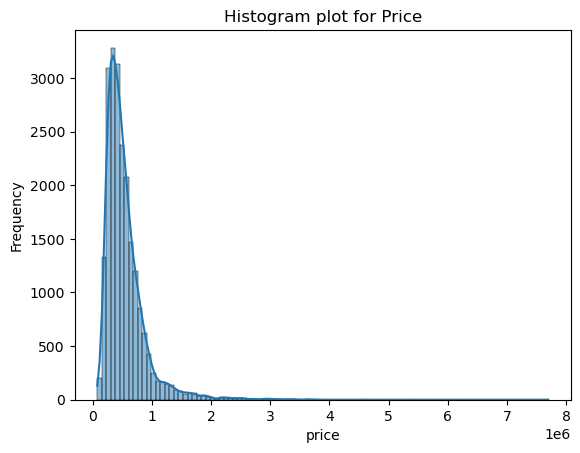

In [56]:
sns.histplot(data=houseprice, x='price', bins=100, kde= True);
plt.xlabel('price')
plt.ylabel('Frequency')
plt.title('Histogram plot for Price')
plt.show()

- This is a right skewed distribution sisnce the mean and median are far from each other taking insights from the desciptive analysis above and also all the values are above 0.5.
- There are also some outliers

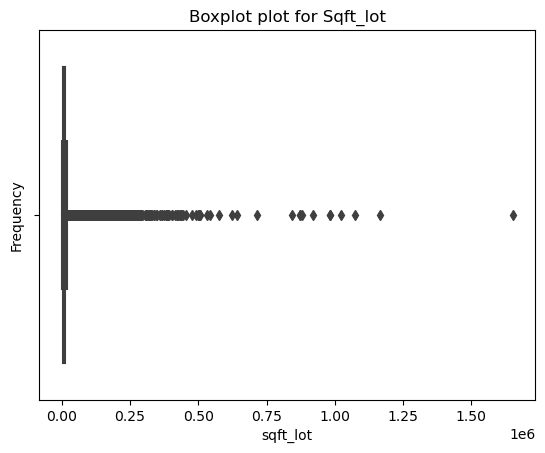

In [57]:
sns.boxplot(data=houseprice, x='sqft_lot');
plt.xlabel('sqft_lot')
plt.ylabel('Frequency')
plt.title('Boxplot plot for Sqft_lot')
plt.show()

- This is a right skewed distribution since the mean and median are far from each other taking insights from the desciptive analysis above and also all the values are above 0.5.
- There are also some outliers

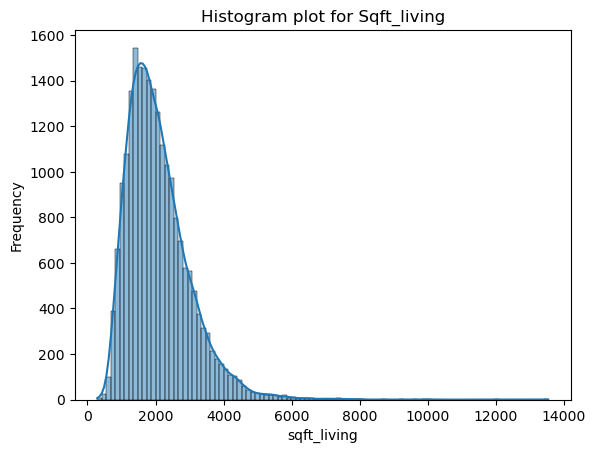

In [55]:
sns.histplot(data=houseprice, x='sqft_living', bins=100,kde= True);
plt.xlabel('sqft_living')
plt.ylabel('Frequency')
plt.title('Histogram plot for Sqft_living')
plt.show()

- This is a right skewed distribution sisnce the mean and median are far from each other taking insights from the desciptive analysis above and also all the values are above 0.5.
- There are also some outliers

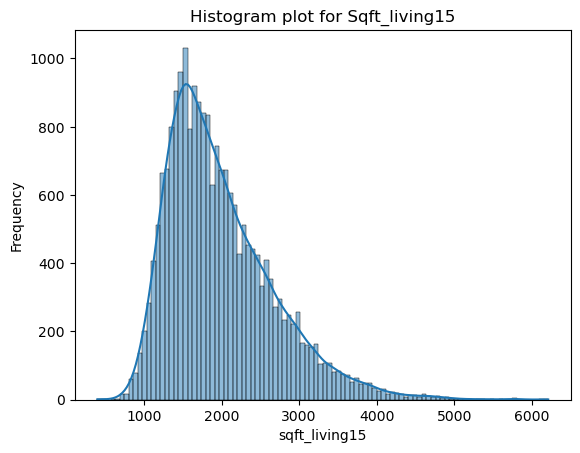

In [54]:
sns.histplot(data=houseprice, x='sqft_living15', bins=100, kde= True);
plt.xlabel('sqft_living15')
plt.ylabel('Frequency')
plt.title('Histogram plot for Sqft_living15')
plt.show()

- This is slightly right skewed distribution sisnce the mean and median are not far from each other taking insights from the desciptive analysis above and also all the values are above 0.5.
- There are also some outliers

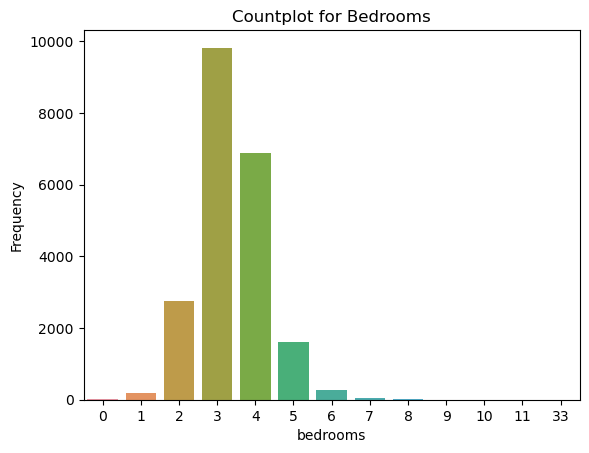

In [58]:
sns.countplot(data=houseprice, x='bedrooms')
plt.xlabel('bedrooms')
plt.ylabel('Frequency')
plt.title('Countplot for Bedrooms')
plt.show()

- The house with three bedroom has the highest number of frequency
- The house with 33 bedrooms has the least number of frequency

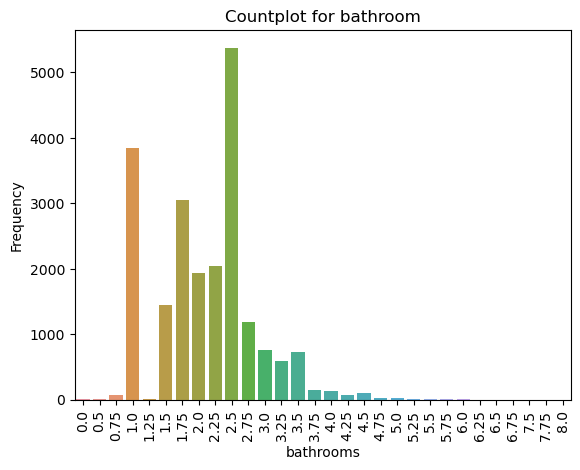

In [59]:
sns.countplot(data=houseprice, x='bathrooms')
plt.xlabel('bathrooms')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.title('Countplot for bathroom')
plt.show()

- The house with 2.5 number of bathrooms has the highest frequency.

# Bivariate Analysis

## To deduce the variables to plot against houseprice, we will check the correlation between the variables.

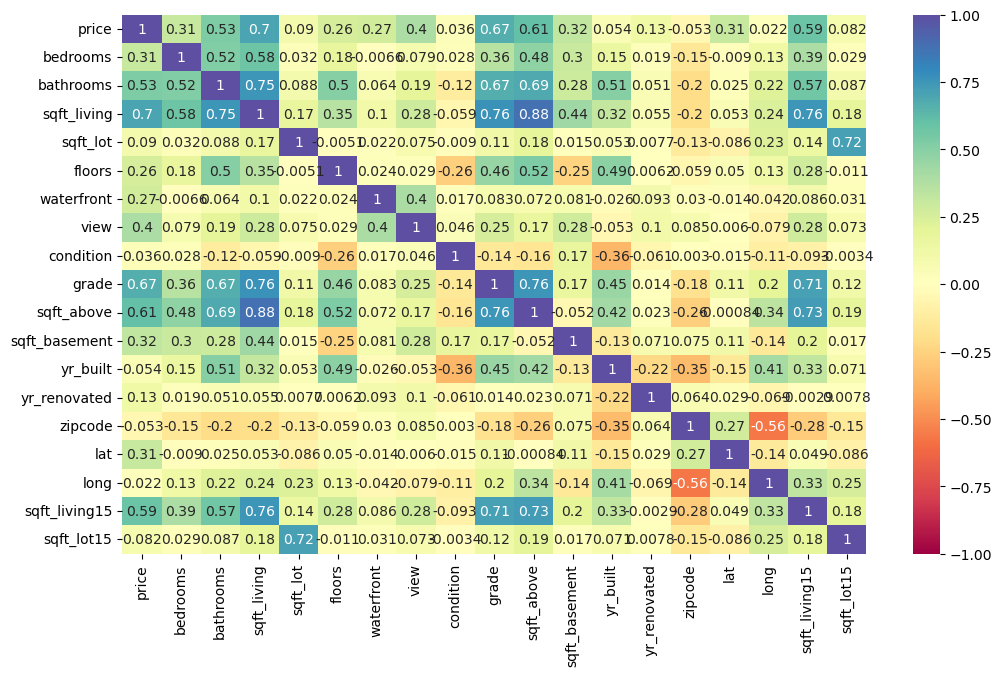

In [15]:
corr_mat=houseprice[houseprice.columns].corr()
corr_mat
plt.figure(figsize=(12, 7))
sns.heatmap(data = corr_mat, annot = True, vmin = -1, vmax = 1, cmap = 'Spectral');

## The correlation of the dependent variables to the target variable are considered and the below are the observations.
- sqft_above,grade and sqft_living are highly correlated.
- sqft_living 15 and bathroom are moderately correlated.
- bedroom, lat and view are lowly correlated.

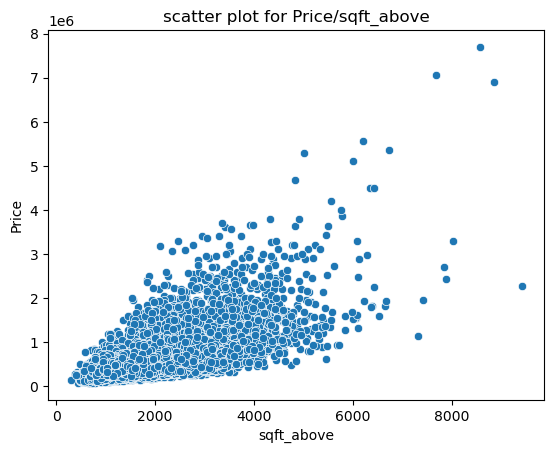

In [16]:
sns.scatterplot(data=houseprice, x='sqft_above', y='price')
plt.xlabel('sqft_above')
plt.ylabel('Price')
plt.title('scatter plot for Price/sqft_above')
plt.show()

- Higher numbers of sqft_above sold is between 0 and 5500 but at lower prices.
- Higher sales for sqft_above were experienced between 7,500 and 9,500

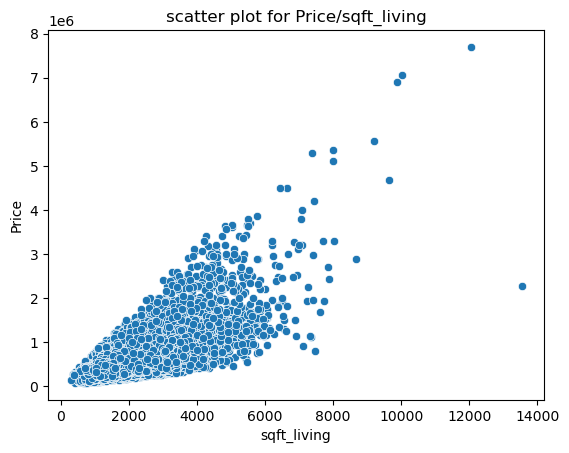

In [17]:
sns.scatterplot(data=houseprice, x='sqft_living', y='price')
plt.xlabel('sqft_living')
plt.ylabel('Price')
plt.title('scatter plot for Price/sqft_living')
plt.show()

- Higher numbers of sqft_living sold is between 0 and 6000 but at lower prices.
- Higher sales for sqft_living were experienced between 10,000 and 14,000

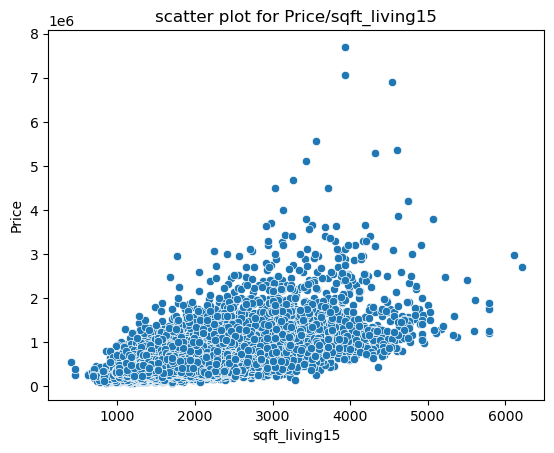

In [18]:
sns.scatterplot(data=houseprice, x='sqft_living15', y='price')
plt.xlabel('sqft_living15')
plt.ylabel('Price')
plt.title('scatter plot for Price/sqft_living15')
plt.show()

- Higher numbers of sqft_living15 sold is between 1000 and 5000 sqft but at lower prices.
- Higher sales for sqft_living15 were experienced between 3,500 and 4,500

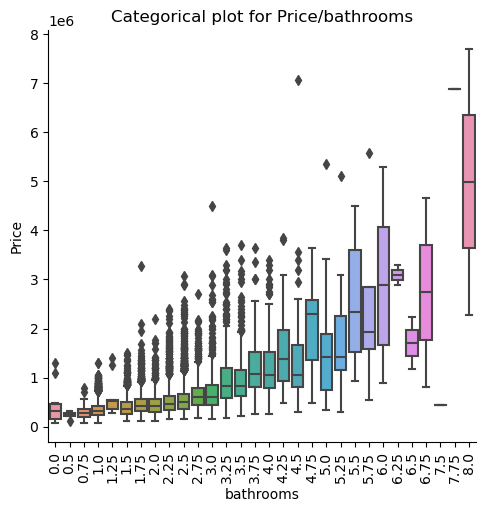

In [61]:
sns.catplot(data=houseprice, x='bathrooms', y='price', kind='box')
plt.xlabel('bathrooms')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.title('Categorical plot for Price/bathrooms')
plt.show()

- Houses with zero bathroom are sold at almost same price as the one with one bathroom
- The prices of houses with 8 bathrooms are the highest.

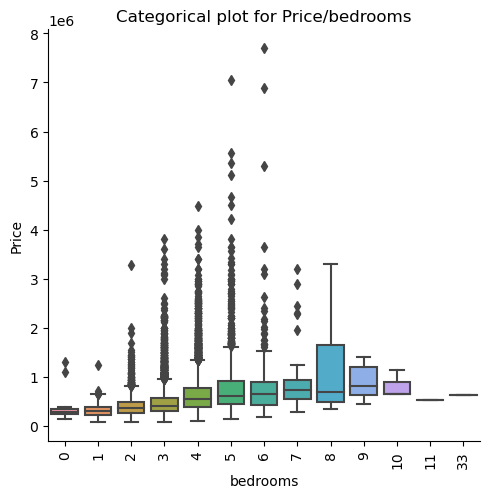

In [20]:
sns.catplot(data=houseprice, x='bedrooms', y='price', kind='box')
plt.xlabel('bedrooms')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.title('Categorical plot for Price/bedrooms')
plt.show()

- There are more sales for houses with bedrooms from 0 to 7
- The house with 8 bedrooms is the most expensive that are well sold.

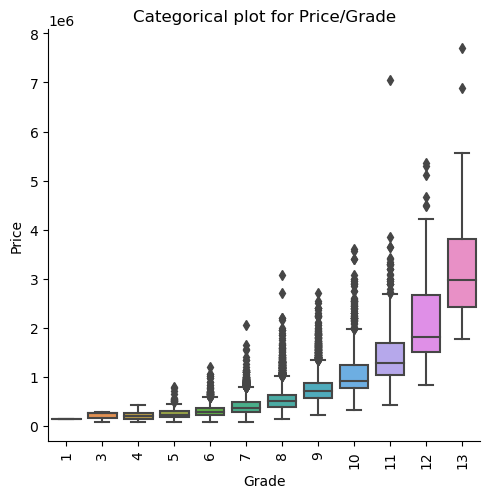

In [60]:
sns.catplot(data=houseprice, x='grade', y='price', kind='box')
plt.xlabel('Grade')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.title('Categorical plot for Price/Grade')
plt.show()

- The above graphical representation indicates that the higher the grade the higher the price of the house
- The house with lower grade are sold at cheap prices and less people purchase them.

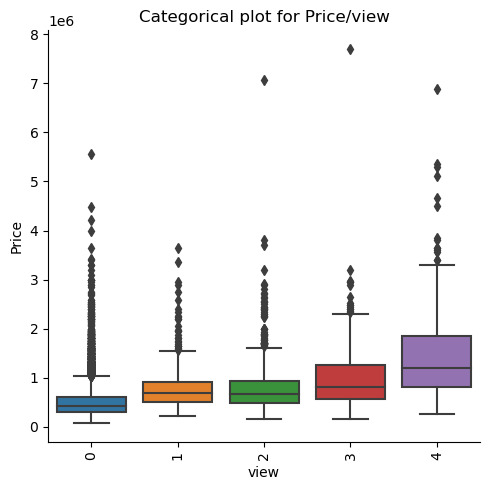

In [62]:
sns.catplot(data=houseprice, x='view', y='price', kind='box')
plt.xlabel('view')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.title('Categorical plot for Price/view')
plt.show()

- There least expensive houses are  those with no views.
- The house with 4 views are sold at higher prices.

# Importing required tool for our linear regression model

In [23]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [24]:
x= houseprice.drop('price', axis=1)
y= houseprice['price']

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)

In [26]:
scaler = MinMaxScaler()
x_train_sd = scaler.fit_transform(x_train)
x_test_sd = scaler.transform(x_test)

Scale the data after spliting the data

# Trainning the model

In [27]:
lreg= LinearRegression()

In [28]:
lreg.fit(x_train_sd, y_train)

LinearRegression()

## Compute the co-efficient

In [29]:
for index, col_name in enumerate(x.columns):
    print(f'{col_name} has coefficient {lreg.coef_[index]}')

bedrooms has coefficient -381705.8264448816
bathrooms has coefficient 327779.83918236214
sqft_living has coefficient 821729.3317277803
sqft_lot has coefficient 299095.49270111794
floors has coefficient 12148.078246677003
waterfront has coefficient 583367.622845426
view has coefficient 216818.97391939303
condition has coefficient 103789.22513370903
grade has coefficient 965465.23946218
sqft_above has coefficient 930181.8734041483
sqft_basement has coefficient 408777.43416316586
yr_built has coefficient -289704.05461465486
yr_renovated has coefficient 40261.42792282735
zipcode has coefficient -119927.21167180249
lat has coefficient 374443.1231709279
long has coefficient -266754.739824888
sqft_living15 has coefficient 106928.02595782196
sqft_lot15 has coefficient -388096.9988169523


- for a unit increase in number of bedroom, houseprice will be affected negatively by 381,706 times
- for a unit increase in number of bathroom, the target variable will be affected positively by 327,780 times
- for a unit increase in number of sqft_living, houseprice will be affected positively by 821,729 times
- for a unit increase in number of sqft_lot, houseprice will be affected positively by 299,095 times
- for a unit increase in number of floors, houseprice will be affected positively by 12,148 times
- for a unit increase in number of waterfront, houseprice will be affected positively by 583,368 times
- for a unit increase in number of view, the target variable will be affected positively by 216,819 times
- for a unit increase in number of condition, the target variable will be affected positively by 103789 times
- for a unit increase in number of grade, houseprice will be affected positively by 965,465 times
- for a unit increase in number of sqft_above, the target variable will be affected positively by 930,182 times
- for a unit increase in number of sqft_basement, houseprice will be affected positively by 408,777 times
- for a unit increase in number of yr_built, the target variable will be affected negatively by 289,704 times
- for a unit increase in number of yr_renovated, houseprice will be affected positively by 40,261 times
- for a unit increase in number of zipcode, the target variable will be affected negatively by 119,927 times
- for a unit increase in number of lat, houseprice will be affected positively by 374,443 times
- for a unit increase in number of long, houseprice will be affected negatively by 266,755 times
- for a unit increase in number of sqft_living15, the target variable will be affected positively by 106928 times
- for a unit increase in number of sqft_lot15, houseprice will be affected negatively by 388,096 times



In [30]:
lreg.intercept_

-234406.59729873063

In [31]:
def model_performance_regression(model, predictors, target):
    pred = model.predict(predictors)
    r2 = r2_score(target, pred)  # to compute R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    # predicting using the independent variables
    pred = model.predict(predictors)
    # creating a dataframe of metrics
    df_perf = pd.DataFrame({"RMSE": rmse,"MAE": mae,"R-squared": r2}, index=[0],)
    return df_perf

In [32]:
model_performance_regression(lreg, x_train_sd, y_train)

,RMSE,MAE,R-squared
0,200783.648364,126214.22557,0.701762


In [33]:
model_performance_regression(lreg, x_test_sd, y_test)

,RMSE,MAE,R-squared
0,202626.203417,126230.342963,0.694757


## The performance of the model is not great but the model generalizes well, since the R-squared values in train and test are almost the same value.

## To fruther improve the model, i will be using the Ridge and Lasso regression to train the model and check if there is change in the performance

In [34]:
ridge=Ridge()
ridge.fit(x_train_sd, y_train)

Ridge()

In [35]:
model_performance_regression(ridge, x_train_sd, y_train)

,RMSE,MAE,R-squared
0,200796.281917,126029.085992,0.701724


In [36]:
model_performance_regression(ridge, x_test_sd, y_test)

,RMSE,MAE,R-squared
0,202552.639953,125975.511017,0.694979


In [37]:
lasso= Lasso()
lasso.fit(x_train_sd, y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.068e+13, tolerance: 2.045e+11
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [38]:
model_performance_regression(lasso, x_train_sd, y_train)

,RMSE,MAE,R-squared
0,200783.680169,126215.7824,0.701762


In [39]:
model_performance_regression(lasso, x_test_sd, y_test)

,RMSE,MAE,R-squared
0,202624.362062,126227.991497,0.694763


## Despite applying ridge and lasso, the model performance does not have a significant change.

## I will be reducing the parameters and focus on the parameters with positive correlation with target variable('price') to further build the model and experiment if the model will improve in its performance

In [40]:
houseprice.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [41]:
x3=houseprice[['bedrooms', 'bathrooms', 'sqft_living', 'view', 'grade', 'sqft_above','lat',
       'sqft_living15']]
y3=houseprice['price']


In [42]:
x3_train, x3_test, y3_train, y3_test = train_test_split(x3,y3, test_size=0.3, random_state=0)

In [43]:
x3_train_sd=scaler.fit_transform(x3_train)
x3_test_sd=scaler.transform(x3_test)

In [44]:
lreg3=LinearRegression()

In [45]:
lreg3.fit(x3_train_sd, y3_train)

LinearRegression()

In [46]:
lreg3.coef_

array([-311564.41397749,  -81930.35166437, 2469688.70091072,
        392165.78352204,  783380.07459166, -105124.91718663,
        407648.26058794,    8136.06152308])

In [47]:
for index, col3_name in enumerate(x3.columns):
    print(f'{col3_name} has coefficient {lreg3.coef_[index]}')

bedrooms has coefficient -311564.41397749196
bathrooms has coefficient -81930.35166437476
sqft_living has coefficient 2469688.700910721
view has coefficient 392165.7835220398
grade has coefficient 783380.0745916576
sqft_above has coefficient -105124.91718663469
lat has coefficient 407648.26058794
sqft_living15 has coefficient 8136.061523076994


In [48]:
model_performance_regression(lreg3, x3_train_sd, y3_train)

,RMSE,MAE,R-squared
0,219414.901573,136962.141701,0.643845


In [49]:
model_performance_regression(lreg3, x3_test_sd, y3_test)

,RMSE,MAE,R-squared
0,222910.800768,137333.810617,0.630583


# When the number of variables is reduced the performance of the model dropped, this implies that all variables are import to the model, in future we will look at the data independently and looked at the one with skewed distributions and turn them to normal distribution by taking their log(). 